# Challenge 8: Roller Coaster Analysis

### Scenario
You are a data analyst and you have been tasked with uncovering insights about roller coasters. The data is very messy and will require some cleaning. Your manager would like the following questions answered.

In [82]:
# import libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# get dataset
url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'
df = pd.read_csv(url)
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


### 1. How many columns and rows are in the dataset?

In [84]:
# shape of dataset
print('The number of columns is', df.shape[1])
print('The number of rows is', df.shape[0])

The number of columns is 56
The number of rows is 1087


### 2. Is there any missing data?

In [85]:
# check for missing datapoints
missing_data = df.isna().sum().sum()
if missing_data > 0:
    print('Yes, there is missing data')
else:
    print('No, there is no missing data')

Yes, there is missing data


### 3. Display the summary statistics of the numeric columns using the describe method.

In [86]:
# define numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns
# use the describe method to display statistics
numeric_columns.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### 4. Rename the following columns:
coaster_name ➡️  Coaster_Name,
year_introduced ➡️ Year_Introduced,
opening_date_clean ➡️ Opening_Date,
speed_mph ➡️ Speed_mph,
height_ft ➡️ Height_ft,
Inversions_clean ➡️ Inversions,
Gforce_clean ➡️ Gforce

In [87]:
# rename columns
column_rename_dict = {
    'coaster_name': 'Coaster_Name',
    'year_introduced': 'Year_Introduced',
    'opening_date_clean': 'Opening_Date',
    'speed_mph': 'Speed_mph',
    'height_ft': 'Height_ft',
    'Inversions_clean': 'Inversions',
    'Gforce_clean': 'Gforce'
}

# Rename the specified columns
df_1 = df.rename(columns=column_rename_dict)
df_1.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


### 5. Are there any duplicated rows?

In [88]:
# check for duplicates
duplicate = df_1.duplicated().sum()
if duplicate > 0:
    print('Yes, there are duplicated rows')
else:
    print('No, there are no duplicated rows')

No, there are no duplicated rows


### 6. What are the top 3 years with the most roller coasters introduced?

In [89]:
# top 3 years with the most roller coasters introduced
top_3 = df_1['Year_Introduced'].value_counts()
top_3.head(3)

1999    49
2000    47
1998    32
Name: Year_Introduced, dtype: int64

### 7. What is the average speed? Also display a plot to show it’s distribution.

Average speed: 48.62


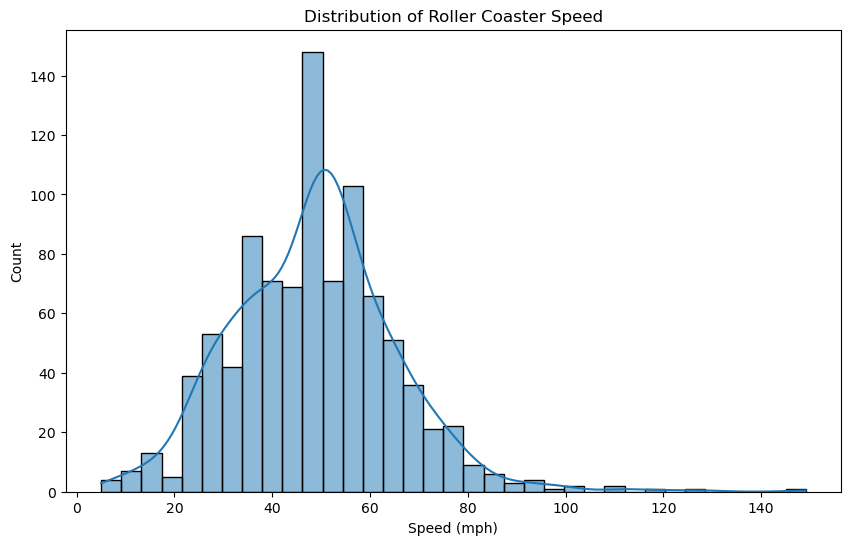

In [90]:
# average speed
average_speed = round(df_1['Speed_mph'].mean(), 2)
print("Average speed:", average_speed)

# heatmap plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_1, x='Speed_mph', kde=True)
plt.title("Distribution of Roller Coaster Speed")
plt.xlabel("Speed (mph)")
plt.ylabel("Count")
plt.show()

### 8. Explore the feature relationships. Are there any positively or negatively correlated relationships?

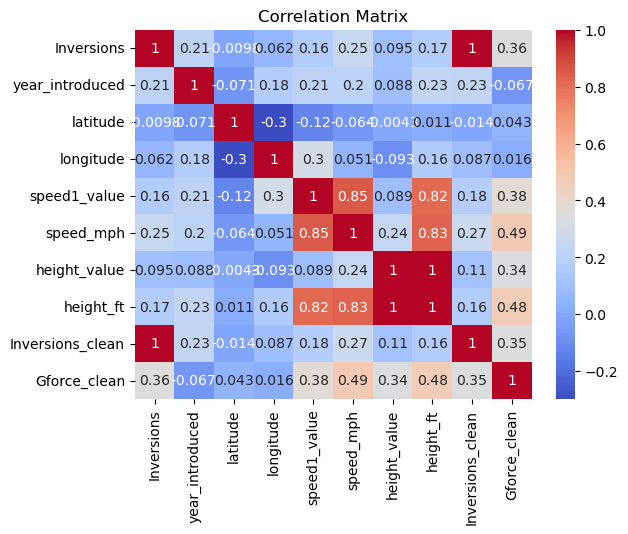

In [91]:
# feature relationships
feature_relationship = df.corr()
sns.heatmap(feature_relationship, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 9. Create your own question and answer it.

In [108]:
# 1. Which material was mostly used in making the roller coasters and how many were constructed with it?
# material used in making most roller coasters
material = df_1['Type'].value_counts().idxmax()
print(material + ' was mostly used for making the roller coasters')

Steel was mostly used for making the roller coasters


In [109]:
# number of roller coasters the material was used for
num_of_roller_coasters = df_1[df_1['Type'] == material].shape[0]
print('The number of roller coasters the material was for is', num_of_roller_coasters)

The number of roller coasters the material was for is 308


Challenge completed!!!